In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

### Загрузим датасет с машинами. Цель - верно восстанавливать для каждой из них цену продажи!

In [140]:
data = pd.read_csv('less_18/data/autos.csv')

data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [141]:
### Колонка с тергетом - "selling price"

X = data.drop("selling_price", axis=1)
y = data["selling_price"]

### Будем замерять MSLE!
### Поэтому прологарифмируем таргет
### А после оптимизируем MSE

y = y.apply(np.log1p)

In [142]:
### Разделим выборку на трейн и тест!

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

__Задание__ 

Реализуйте свой MeanTargetEncoder с добавленем некоторого шума!

Однажды в лекционном материале, обсуждая счетчики, мы говорили с вами о том, что из-за них модели могут переобучаться. Один из способов бороться с этим - валидировать расчеты среднего таргета (стратегия отложенной выборки / расчеты на кросс-валидации). Но есть еще проще!

Можно просто к значению счетчика добавить случайный шум (зашумить данные)!

Напомним, что рассчитываться новые признаки должны по такой формуле:

$$
g_j = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}{l} + C * \epsilon
$$



Пусть шум будет случайной величиной из нормального стандартного распределения, то есть $\epsilon \sim N(0, 1) $, а $ C = 0.006$.

Создавая свой класс-трансформер, наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`. Трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и список из числовых признаков. 

Если для какого-то признака в тестовой выборке отсутствует значение, трансформер должен поставить там 0.

На выходе должен получиться датасет того же размера с измененными категориальными признаками.

Класс MeanTargetEncoderNoise должен иметь следующую сигнатуру:



In [143]:
from sklearn.base import BaseEstimator, TransformerMixin

class MeanTargetEncoderNoise(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical, numeric):
        
        ### Your code is here
    
    def fit(self, X, y):

        ### Your code is here

        return self
        
    def transform(self, df):
        
        ### Your code is here
        
        return temp

IndentationError: expected an indented block after function definition on line 5 (1446550018.py, line 9)

Разделите колонки на вещественные и категориальные. Приведите все категориальные колонки к типу `object`.

Далее применим наш кодировщик к `X_train, X_test`, так же как например мы применяем `StandardScaler`, чтобы проверить работоспособность нашего класса. Установите зерно датчика случайный чисел `np.random.seed(1)`.

После того, как вы изменили обучающую и тестовую выборки, сохраните первые 10 строк полученного промежуточного датафрейма обучающей выборки (`X_train`) в файл в формате csv с сепаратором `;`. Не забудьте индекс. Отправьте полученный файл в форму ниже.

Список колонок которые должны быть в файле для сдачи:
```py
cols = [
    "km_driven",
    "name",
    "year",
    "fuel",
    "seller_type",
    "transmission",
    "owner"
]
```

### Ваше решение


Разделение колонок на категориальные и числовые.

In [144]:
object_cols = ['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner']
num_cols = ['km_driven']

X.head()

,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner


Реализация класса MeanTargetEncoderNoise.

### Заметки для будущего меня для создания MeanTargetEncoder-а

1) Лучше всего использовать MeanTargetEncoder закодированный по multiclass, когда мы имеем насыщенный информацей, но в то-же время не слишком богатый на классы y
2) В фите я должен разбить y_train по OHE энкодеру, далее итеративно переберать все категориальные признаки слдеюущим образом:
- инициализирую цикл с категориальными признаками:
for col in categorical_cols:
- внутри него инициализирую цикл для каждого класса-колонки, полученной от OHE энкодинга:
for tg in target_columns:
- группируюсь по категориальному признаку и нахожу среднее для каждого категориального значения по tg (классу-колонке):
mean_tg = df.groupby(col)[tg].mean()
- 
- группируюсь по нему, считаю среднее 


На каждый класс формируется своя серия 

таким образом я получаю dict_of_means, который потом буду применять категориальные столбцы, в количестве равное количеству классов на обучении.

In [190]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import KFold
import itertools

class MeanTargetEncoder_(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical_cols, numeric_cols, target_name, mte_fillna_strategy="none", mte_strategy="noise", noise_k=0.006):              
        self.categorical_cols = categorical_cols ### имена столбцов с категориальными значениями
        self.numeric_cols = numeric_cols ### имена столбцов с вещественными значениями
        self.target_name = target_name ### имя целевой переменной
        self.mte_fillna_strategy = mte_fillna_strategy ### none; mean; mode
        self.mte_strategy = mte_strategy ### none; noise; cv_split; multiclass
        self.noise_k = noise_k ### коэффициент шума
        self.mean_target_dict = {} ### словарь для хранения средних значений по таргету (классификация) сгруппированных категориальных значений 
        self.dict_of_means = {} ### словарь для хранения средних значений по таргету (регрессия) сгруппированных категориальных значений 

    def fit(self, X, y):
        X_fit = X.copy()
        y_fit = y.copy()
        
        X_with_target = pd.concat((X_fit, y_fit), axis=1) 
        
        if self.mte_strategy == "none":

            """
            Кодирует категориальные признаки с использованием счетчиков на основе вещественной-целевой переменной.
            """

            for col in self.categorical_cols:
                self.dict_of_means[col] = X_with_target.groupby(col)[self.target_name].mean()

        elif self.mte_strategy == "noise":

            """
            Кодирует категориальные признаки с использованием счетчиков на основе вещественной-целевой переменной и добавляет шум.
            """

            for col in self.categorical_cols:
                self.dict_of_means[col] = X_with_target.groupby(col)[self.target_name].mean() + self.noise_k * np.random.randn(len(X_with_target[col].unique()))
    
        elif self.mte_strategy == "cv_split":

            """
            В данной реализации используется кросс-валидация, которая обеспечивает взаимодействие между фолдами. Вот как это происходит:
            1. Данные разбиваются на фолды, и каждый фолд используется как валидационный набор данных для оценки модели,
            обученной на остальных фолдах (тренировочных данных).
            2. Для вычисления счетчиков каждый фолд используется как часть обучающего набора данных, а другие фолды (кроме текущего)
            используются для вычисления статистики (среднего значения таргетной переменной для каждой категории).
            3. Это означает, что информация из других фолдов используется для создания счетчиков в текущем фолде.
            Таким образом, категориальные признаки в одном фолде расчитываются по значениям таргетной переменной из других фолдов.
            """

            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            for col in self.categorical_cols:
                col_means = []
                for index, (train_index, val_index) in enumerate(kf.split(X_with_target)):
                    kf_train = X_with_target.iloc[train_index]
                    count_map = kf_train.groupby(col)[self.target_name].mean()
                    count_map = count_map + self.noise_k * np.random.randn(len(count_map))
                    col_means.append(count_map)
                self.dict_of_means[col] = pd.concat(col_means, axis=1).mean(axis=1)

        elif self.mte_strategy == "multiclass":

            """
            Кодирует категориальные признаки с использованием счетчиков на основе мультиклассовой целевой переменной.
            """

            self.target_dummies = pd.get_dummies(y, prefix=self.target_name)
            X_with_target = pd.concat([X, self.target_dummies], axis=1)
            
            for col in self.categorical_cols:
                for tg in self.target_dummies.columns:
                    mean_target = X_with_target.groupby(col)[tg].mean()
                    if tg not in self.mean_target_dict:
                        self.mean_target_dict[tg] = {}
                    self.mean_target_dict[tg][col] = mean_target

            print(f"Сводка для кодирования мультиклассового-счетчика: ")
            print(f"Кол-во категориальных фичей: {len(self.categorical_cols)}")
            print(f"Кол-во уникальных классов: {y_fit.nunique()}")
            print(f"Кол-во столбцов, которое должно получится при кодировании: {len(self.categorical_cols) * y_fit.nunique()}")
            print(f"Окончательное кол-во столбцов с учетом отброса по одному столбцу от закодированного класса получается: {(len(self.categorical_cols) * y_fit.nunique()) + (X.shape[1] - len(self.categorical_cols)) - len(self.categorical_cols)}")

        else:
            raise ValueError("Unsupported mte_strategy strategy. Please choose either 'none', 'noise', 'cv_split' or 'multiclass'.")
        
        return self

    def transform(self, X):
        X_trans = X.copy()

        if self.mte_strategy != "multiclass":
            for col in self.categorical_cols:
                X_trans[col] = X_trans[col].map(self.dict_of_means[col])
                X_trans[col] = self.fillnans(X_trans, col, self.dict_of_means[col])
        else:
            new_columns = {}
            for col in self.categorical_cols:
                for target in self.mean_target_dict.keys():
                    new_col_name = f"{col}_{target}"
                    new_columns[new_col_name] = X[col].map(self.mean_target_dict[target][col])
                    new_columns[new_col_name] = self.fillnans(new_columns, new_col_name, self.mean_target_dict[target][col])

                ### Удаляем один закодированный столбец по категории для того чтобы избежать мультиколлинеарности
                del new_columns[f"{col}_{target}"]

            X_trans = X_trans.join(pd.DataFrame(new_columns))
            X_trans.drop(columns=self.categorical_cols, inplace=True)

        return X_trans
    
    def fillnans(self, X, col, dict_of_means):

        ### Если на проде или на тестовой выборке мы получили новые категории, которые не были в обучении
        ### то заполняем эти данные по общему среднему всех полученных значений для того чтобы избавится от NaN-ов

        if X[col].isna().sum() != 0:
            if self.mte_fillna_strategy == "none":
                X[col] = X[col].fillna(0)
            elif self.mte_fillna_strategy == 'mean':
                mean_value = dict_of_means.mean()
                X[col] = X[col].fillna(mean_value)
            elif self.mte_fillna_strategy == 'mode':
                mode_value = X[col].mode()[0]
                X[col] = X[col].fillna(mode_value)
            else:
                raise ValueError("Unsupported fillna strategy. Please choose either 'none', 'mean' or 'mode'.")
        return X[col]

In [191]:
transformer_none = MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="none")

transformer_none.fit(X_train, y_train)

train = transformer_none.transform(X_train)
test = transformer_none.transform(X_test)

train.head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner
3294,13.469119,13.439563,50000,13.089123,12.618096,13.771251,12.972935
2290,12.115454,11.910155,70000,12.453348,12.618096,13.771251,12.972935
874,12.301762,13.336728,50000,12.453348,12.618096,12.638189,12.972935
1907,12.484095,13.057348,92198,12.453348,13.147319,12.638189,12.460189
3244,12.391951,12.860755,3240,12.453348,12.618096,12.638189,12.460189
1089,12.690560,13.439563,10000,12.453348,13.147319,12.638189,12.972935
3902,11.696890,11.503453,90000,12.453348,12.618096,12.638189,11.870401
2215,11.121822,11.503453,79000,12.453348,12.618096,12.638189,12.460189
3862,13.171979,13.336728,99700,13.089123,12.618096,12.638189,12.972935
705,12.999160,12.245474,124000,13.089123,12.618096,12.638189,12.460189


In [192]:
transformer_noise = MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="noise")

transformer_noise.fit(X_train, y_train)

train = transformer_noise.transform(X_train)
test = transformer_noise.transform(X_test)

train.head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner
3294,13.477625,13.430290,50000,13.085738,12.605132,13.767648,12.968583
2290,12.116720,11.915660,70000,12.455170,12.605132,13.767648,12.968583
874,12.307447,13.341052,50000,12.455170,12.605132,12.634297,12.968583
1907,12.486549,13.060473,92198,12.455170,13.142515,12.634297,12.456695
3244,12.396318,12.865551,3240,12.455170,12.605132,12.634297,12.456695
1089,12.691434,13.430290,10000,12.455170,13.142515,12.634297,12.968583
3902,11.687503,11.508086,90000,12.455170,12.605132,12.634297,11.882307
2215,11.123730,11.508086,79000,12.455170,12.605132,12.634297,12.456695
3862,13.178090,13.341052,99700,13.085738,12.605132,12.634297,12.968583
705,13.001054,12.250967,124000,13.085738,12.605132,12.634297,12.456695


In [193]:
transformer_cv_split = MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="cv_split")

transformer_cv_split.fit(X_train, y_train)

train = transformer_cv_split.transform(X_train)
test = transformer_cv_split.transform(X_test)

train.head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner
3294,13.469522,13.442374,50000,13.088808,12.617452,13.769914,12.969108
2290,12.088372,11.907176,70000,12.456441,12.617452,13.769914,12.969108
874,12.305250,13.331267,50000,12.456441,12.617452,12.641876,12.969108
1907,12.487510,13.058922,92198,12.456441,13.148949,12.641876,12.460351
3244,12.392873,12.861804,3240,12.456441,12.617452,12.641876,12.460351
1089,12.686425,13.442374,10000,12.456441,13.148949,12.641876,12.969108
3902,11.692502,11.510107,90000,12.456441,12.617452,12.641876,11.871804
2215,11.122608,11.510107,79000,12.456441,12.617452,12.641876,12.460351
3862,13.170396,13.331267,99700,13.088808,12.617452,12.641876,12.969108
705,13.001339,12.245624,124000,13.088808,12.617452,12.641876,12.460351


In [194]:
transformer_milticlass = MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="multiclass")

transformer_milticlass.fit(X_train, y_train)

train = transformer_milticlass.transform(X_train)
test = transformer_milticlass.transform(X_test)

train.head(10)

Сводка для кодирования мультиклассового-счетчика: 
Кол-во категориальных фичей: 6
Кол-во уникальных классов: 424
Кол-во столбцов, которое должно получится при кодировании: 2544
Окончательное кол-во столбцов с учетом отброса по одному столбцу от закодированного класса получается: 2539


,km_driven,name_selling_price_9.90353755128617,name_selling_price_10.463131911491967,name_selling_price_10.53212287826962,name_selling_price_10.596659732783579,name_selling_price_10.645448706505872,name_selling_price_10.714439990727769,name_selling_price_10.778977123006351,name_selling_price_10.819798284210286,name_selling_price_10.841774582282179,name_selling_price_10.859018228147887,name_selling_price_10.915106645867503,name_selling_price_10.933124826700707,name_selling_price_10.968215530759236,name_selling_price_11.002116507732017,name_selling_price_11.0186455364637,name_selling_price_11.034905792929415,name_selling_price_11.082157933374816,name_selling_price_11.127277689932466,name_selling_price_11.141876276228,name_selling_price_11.156264806643742,name_selling_price_11.170449240431308,name_selling_price_11.184435286790631,name_selling_price_11.19822841866684,name_selling_price_11.225256725762893,name_selling_price_11.264476926102367,name_selling_price_11.273309485087486,name_selling_price_11.277215789596893,name_selling_price_11.289794413577894,name_selling_price_11.302216779257382,name_selling_price_11.314486721293981,name_selling_price_11.350418300109132,name_selling_price_11.385103457032141,name_selling_price_11.407564949312402,name_selling_price_11.407576060361786,name_selling_price_11.438212694578302,name_selling_price_11.440365524765756,name_selling_price_11.461642696843066,name_selling_price_11.48247656671073,name_selling_price_11.49273296168228,name_selling_price_11.502885230075814,name_selling_price_11.51293546492023,name_selling_price_11.561725152903833,name_selling_price_11.571203807011969,name_selling_price_11.608244735642321,name_selling_price_11.6172944892629,name_selling_price_11.652687407345388,name_selling_price_11.661345470088502,name_selling_price_11.695255355062795,name_selling_price_11.703554089007538,name_selling_price_11.719947764402807,name_selling_price_11.736077016252437,name_selling_price_11.744045122410057,name_selling_price_11.775297421715827,name_selling_price_11.798111925972618,name_selling_price_11.80560254159177,name_selling_price_11.813037464800539,name_selling_price_11.835016210489899,name_selling_price_11.849404844423074,name_selling_price_11.863589378812122,name_selling_price_11.884495917930655,name_selling_price_11.904974309480183,name_selling_price_11.91170829631447,name_selling_price_11.918397239722838,name_selling_price_11.92504173829169,name_selling_price_11.951186847493476,name_selling_price_11.976665770490767,name_selling_price_11.982935344196433,name_selling_price_12.001511614739405,name_selling_price_12.00762780434872,name_selling_price_12.013706813470414,name_selling_price_12.04355959836804,name_selling_price_12.06105265381003,name_selling_price_12.07254696717504,name_selling_price_12.08954444723597,name_selling_price_12.100717685412471,name_selling_price_12.111767460549332,name_selling_price_12.117246896289503,name_selling_price_12.128116509451258,name_selling_price_12.154784614286667,name_selling_price_12.170450649220749,name_selling_price_12.180759965737863,name_selling_price_12.201065128819632,name_selling_price_12.206077645517674,name_selling_price_12.211060187041213,name_selling_price_12.230765258120545,name_selling_price_12.25486757159303,name_selling_price_12.259618151783465,name_selling_price_12.264346270624157,name_selling_price_12.269052139516223,name_selling_price_12.278397958261774,name_selling_price_12.28765724080691,name_selling_price_12.296831574998258,name_selling_price_12.301387370778713,name_selling_price_12.30592250537653,name_selling_price_12.310437165348775,name_selling_price_12.323860125621126,name_selling_price_12.33270970174018,name_selling_price_12.345834587905333,name_selling_price_12.354492650648448,name_selling_price_12.358798024384122,name_selling_price_12.367345048436391,name_selling_price_12.380030154325457,name_selling_price_12.384223015005313,name_selling_price_12.388398368982115,name_selling_price_12.409017571151187,name_selling_price_12.421

In [195]:
import itertools
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

class OneHotEncoder_(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical_cols, numeric_cols, target_name, encoding_method="one_hot"):              

        self.categorical_cols = categorical_cols ### имена столбцов с категориальными значениями
        self.numeric_cols = numeric_cols ### имена столбцов с вещественными значениями
        self.target_name = target_name ### имя целевой переменной
        self.encoding_method = encoding_method ### one_hot; label
        self.label_encoding_dicts = {}  ### словарь для хранения значений кодирования по label-енкодеру 

    def fit(self, X, y):
        
        X_fit = X.copy()
        y_fit = y.copy()
        
        X_with_target = pd.concat((X_fit, y_fit), axis=1) 
        
        if self.encoding_method == 'one_hot':

            ### Запомним все ohe колонки и их названия
            self.ohe_names = {col : sorted([f"{col}_{value}" for value in X_with_target[col].unique()]) for col in self.categorical_cols}


        elif self.encoding_method == 'label':
            ### Закодируем каждое категориальное значение в категориальном признаке  
            for col in self.categorical_cols:
                label_encoding_dicts = {val: idx for idx, val in enumerate(X_with_target[col].unique())}
                self.label_encoding_dicts[col] = label_encoding_dicts


        return self
        
    def transform(self, X):
        
        df_ = X.copy()

        if self.encoding_method == 'one_hot':
            data_part = pd.get_dummies(df_[self.categorical_cols], prefix=None)
            data_part.replace({False: 0, True: 1}, inplace=True)

            # Дропаем все оригинальные категориальные колонки, так как они нам больше не нужны 
            df_ = df_.drop(self.categorical_cols, axis=1)
            # Присоединяем все преобразованные категориальные колонки к датасету 
            df_ = pd.concat((df_, data_part), axis=1)

            # Получение списка всех имен столбцов one-hot в рамках данного класса 
            all_ohe = list(itertools.chain(*list(self.ohe_names.values())))

            ### Фиксируем полученные столбцы после кодирования ohe
            data_part_cols = data_part.columns

            ### На проде или на тесте мы можем не получить категории, которые были в обучении,
            ### в таком случае нам необходимо зафиксировать данные категории и создать столбцы для 
            ### данных категорий, заполнив их нулями, таким образом мы сохраним изначальную размерность датасета на обучении
            missing_columns = [
                x 
                for x in all_ohe
                if x not in df_.columns
                and
                x not in self.numeric_cols
            ]

            ### Отсутствующие категории (бинарные колонки)
            ### необходимо добавить: заполним их просто нулями
            
            if len(missing_columns) != 0:

                zeros = np.zeros((df_.shape[0], len(missing_columns)))
                zeros = pd.DataFrame(zeros,
                                    columns=missing_columns,
                                    index=df_.index)

                df_ = pd.concat((df_, zeros), axis=1)


            ### Также на проде или на тесте мы можем получить новые категории, которые не видлеи на обучении,
            ### таким образом мы можем получить новые столбцы, делать этого нельзя, так как мы потеряем нашу размерноть, 
            ### поэтому фиксируем их и отбрасываем
            extra_columns = [
                x
                for x in data_part_cols
                if x not in all_ohe
            ]

            ### Новые категории необходимо убрать
            df_ = df_.drop(extra_columns, axis=1)

            # Инициализируем новый DataFrame для хранения результата
            new_df = pd.DataFrame()

            # Удаляем первый столбец для каждой категории для избегания мультиколлинеарности 
            for unique_pref in self.ohe_names.keys():
                filtered_cols = df_.filter(like=unique_pref).columns
                # Получаем все столбцы категории
                filtered_df = df_[filtered_cols]
                # Удаляем первый столбец и добавляем остальные в новый DataFrame
                new_df = pd.concat([new_df, filtered_df.drop(filtered_df.columns[0], axis=1)], axis=1)

            # Обновляем df_ новыми значениями без первого столбца для каждой категории
            df_ = new_df

        elif self.encoding_method == 'label':

            for col in self.categorical_cols:
                encoding_dict = self.label_encoding_dicts[col]
                df_[col] = df_[col].map(encoding_dict)
                ### Если на проде или на тестовой выборке мы получили новые категории,
                # то заполняем неизвестные категории значением -1
                if df_[col].isna().sum() != 0:
                    df_[col] = df_[col].fillna(-1)

        else:
            raise ValueError("Unsupported encoding method. Please choose either 'one_hot' or 'label'.")
        
            
        return df_[sorted(df_.columns)]


In [228]:
transformer = OneHotEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", encoding_method="one_hot")

transformer.fit(X_train, y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train.head(10)

C:\Users\danil\AppData\Local\Temp\ipykernel_14612\4017630660.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_part.replace({False: 0, True: 1}, inplace=True)
C:\Users\danil\AppData\Local\Temp\ipykernel_14612\4017630660.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_part.replace({False: 0, True: 1}, inplace=True)


,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,name_Audi A4 35 TDI Premium Plus,name_Audi A4 New 2.0 TDI Multitronic,name_Audi A5 Sportback,name_Audi A6 2.0 TDI Design Edition,name_Audi A6 2.0 TDI Premium Plus,name_Audi A6 2.7 TDI,name_Audi A6 2.8 FSI,name_Audi A8 4.2 TDI,name_Audi A8 L 3.0 TDI quattro,name_Audi Q3 2.0 TDI Quattro Premium Plus,name_Audi Q3 35 TDI Quattro Technology,name_Audi Q5 2.0 TDI,name_Audi Q5 2.0 TFSI Quattro,name_Audi Q5 2.0 TFSI Quattro Premium Plus,name_Audi Q5 3.0 TDI Quattro Technology,name_Audi RS7 2015-2019 Sportback Performance,name_BMW 3 Series 320d Luxury Line,name_BMW 3 Series 320d Sport,name_BMW 3 Series 320d Sport Line,name_BMW 3 Series GT Luxury Line,name_BMW 5 Series 520d Luxury Line,name_BMW 5 Series 525d Sedan,name_BMW 5 Series 530i,name_BMW 7 Series 730Ld,name_BMW 7 Series Signature 730Ld,name_BMW X1 sDrive 20d Exclusive,name_BMW X1 sDrive 20d xLine,name_BMW X1 sDrive20d,name_BMW X1 sDrive20d M Sport,name_BMW X5 xDrive 30d xLine,name_Chevrolet Aveo 1.4,name_Chevrolet Aveo 1.4 LT BSIV,name_Chevrolet Aveo 1.6 LT with ABS,name_Chevrolet Aveo U-VA 1.2,name_Chevrolet Aveo U-VA 1.2 LS,name_Chevrolet Aveo U-VA 1.2 LT,name_Chevrolet Aveo U-VA 1.2 LT WO ABS Airbag,name_Chevrolet Beat Diesel,name_Chevrolet Beat Diesel LS,name_Chevrolet Beat Diesel LT,name_Chevrolet Beat Diesel LT Option,name_Chevrolet Beat Diesel PS,name_Chevrolet Beat LS,name_Chevrolet Beat LT,name_Chevrolet Beat LT LPG,name_Chevrolet Beat LT Option,name_Chevrolet Beat PS,name_Chevrolet Captiva LT,name_Chevrolet Cruze LT,name_Chevrolet Cruze LTZ,name_Chevrolet Cruze LTZ AT,name_Chevrolet Enjoy 1.3 TCDi LS 8,name_Chevrolet Enjoy TCDi LT 7 Seater,name_Chevrolet Enjoy TCDi LT 8 Seater,name_Chevrolet Optra 1.6,name_Chevrolet Optra 1.6 LS,name_Chevrolet Optra Magnum 2.0 LS,name_Chevrolet Optra Magnum 2.0 LS BSIII,name_Chevrolet Optra Magnum 2.0 LT,name_Chevrolet Sail 1.2 Base,name_Chevrolet Sail 1.2 LT ABS,name_Chevrolet Sail 1.3 LS,name_Chevrolet Sail Hatchback 1.2 LS,name_Chevrolet Sail Hatchback 1.3 TCDi,name_Chevrolet Sail Hatchback LS ABS,name_Chevrolet Sail Hatchback LT ABS,name_Chevrolet Sail LS ABS,name_Chevrolet Spark 1.0,name_Chevrolet Spark 1.0 LS,name_Chevrolet Spark 1.0 LT,name_Chevrolet Spark 1.0 LT BS3,name_Chevrolet Spark 1.0 LT Option Pack w/ Airbag,name_Chevrolet Spark 1.0 PS,name_Chevrolet Tavera LS B3 7 Seats BSII,name_Chevrolet Tavera LT L1 7 Seats BSIII,name_Chevrolet Tavera Neo 2 LS B4 7 Str BSIII,name_Chevrolet Tavera Neo 2 LT L 9 Str,name_Chevrolet Tavera Neo 3 10 Seats BSIV,name_Chevrolet Tavera Neo 3 9 Str BSIII,name_Chevrolet Tavera Neo 3 LS 7 C BSIII,name_Chevrolet Tavera Neo 3 LT 9 Seats BSIII,name_Chevrolet Tavera Neo 3 Max 9 Str BSIII,name_Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,name_Daewoo Matiz SD,name_Datsun GO Plus A,name_Datsun GO Plus A Option Petrol,name_Datsun GO Plus Remix Limited Edition,name_Datsun GO Plus T,name_Datsun GO Plus T BSIV,name_Datsun GO Plus T Option,name_Datsun GO Plus T Option BSIV,name_Datsun GO Plus T Option Petrol,name_Datsun GO T BSIV,name_Datsun GO T Option BSIV,name_Datsun GO T Petrol,name_Datsun RediGO 1.0 S,name_Datsun RediGO AMT 1.0 S,name_Datsun RediGO SV 1.0,name_Datsun RediGO T Option,name_Datsun redi-GO AMT 1.0 T Option,name_Fiat 500 Lounge,name_Fiat Avventura MULTIJET Emotion,name_Fiat Avventura Urban Cross 1.3 Multijet Emotion,name_Fiat Grande Punto 1.3 Dynamic (Diesel),name_Fiat Grande Punto Active (Diesel),name_Fiat Grande Punto EVO 1.3 Active,name_Fiat Grande Punto EVO 1.3 Dynamic,name_Fiat Grande Punto Emotion 90Hp,name_Fiat Linea 1.3 Emotion,name_Fiat Linea 1.3 Multijet Emotion,name_Fiat Linea Dynamic,name_Fiat Linea Emotion,name_Fiat Linea Emotion (Diesel),name_Fiat Linea T Jet Emotion,name_Fiat Linea T Jet Plus,name_Fiat Palio 1.2 Sport,name_Fiat Palio D 1.9 EL PS

Проверка работы трансформера.

In [198]:
np.random.seed(1)
transformer = MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="noise")

transformer.fit(X_train, y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train.head(10)

,name,year,km_driven,fuel,seller_type,transmission,owner
3294,13.483692,13.436559,50000,13.093756,12.615863,13.771135,12.977730
2290,12.117029,11.903115,70000,12.453832,12.615863,13.771135,12.977730
874,12.310456,13.328864,50000,12.453832,12.615863,12.639805,12.977730
1907,12.491443,13.042359,92198,12.453832,13.152824,12.639805,12.463313
3244,12.390906,12.870886,3240,12.453832,12.615863,12.639805,12.463313
1089,12.687432,13.436559,10000,12.453832,13.152824,12.639805,12.977730
3902,11.698702,11.503504,90000,12.453832,12.615863,12.639805,11.878390
2215,11.120678,11.503504,79000,12.453832,12.615863,12.639805,12.463313
3862,13.172879,13.328864,99700,13.093756,12.615863,12.639805,12.977730
705,13.004194,12.241213,124000,13.093756,12.615863,12.639805,12.463313


In [199]:
display(test.shape)
display(train.shape)

(868, 7)

(3472, 7)

In [200]:
cols = [
    "km_driven",
    "name",
    "year",
    "fuel",
    "seller_type",
    "transmission",
    "owner"
]

In [201]:
train[cols].head(10).to_csv("less_18/data/train.csv", sep=';', index=False)
some = pd.read_csv("less_18/data/train.csv", sep=';')
some

,km_driven,name,year,fuel,seller_type,transmission,owner
0,50000,13.483692,13.436559,13.093756,12.615863,13.771135,12.977730
1,70000,12.117029,11.903115,12.453832,12.615863,13.771135,12.977730
2,50000,12.310456,13.328864,12.453832,12.615863,12.639805,12.977730
3,92198,12.491443,13.042359,12.453832,13.152824,12.639805,12.463313
4,3240,12.390906,12.870886,12.453832,12.615863,12.639805,12.463313
5,10000,12.687432,13.436559,12.453832,13.152824,12.639805,12.977730
6,90000,11.698702,11.503504,12.453832,12.615863,12.639805,11.878390
7,79000,11.120678,11.503504,12.453832,12.615863,12.639805,12.463313
8,99700,13.172879,13.328864,13.093756,12.615863,12.639805,12.977730
9,124000,13.004194,12.241213,13.093756,12.615863,12.639805,12.463313


Обучите несколько деревьев, перебирая максимальную глубину алгоритма из списка `max_depth_list`, а остальные параметры оставьте дефолтными. Выведите лучшее значение гиперпараметра. Постройте график зависимости MSLE на тестовой выборке от значения гиперпараметра. Воспользуйтесь `Pipeline` без `GridSearch`. Проделайте то же самое с `min_samples_split`, `min_impurity_decrease`, `max_leaf_nodes`. (по 2б на каждый параметр)

In [202]:
max_depth_list = [3, 5, 8, 12]
min_samples_split_list = [10, 50, 100, 500]
min_impurity_decrease_list = [0, 0.1, 0.15, 0.2]
max_leaf_nodes_list = [100, 200, 500]

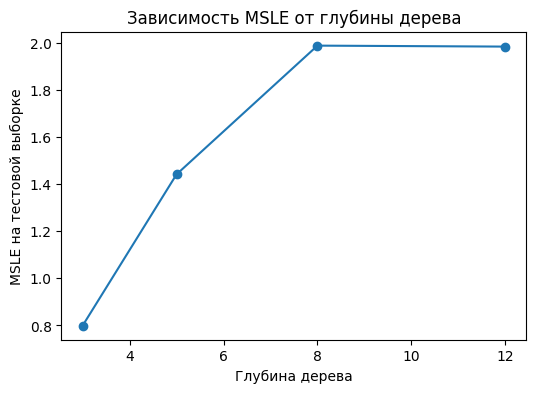

'Лучшее MSLE значение: 0.798'

In [210]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

np.random.seed(1)

### Your code is here

metrics_max_depth = {}

for max_depth in max_depth_list:

    pipe = Pipeline([
        ("transformer_encoder", MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="noise")),
        ("tree", DecisionTreeRegressor(max_depth=max_depth))
    ])

    pipe.fit(X_train, y_train)

    metrics_max_depth[f"depth_{max_depth}"] = {}

    train_MSLE = np.mean((pipe.predict(X_train) - y_train) ** 2)
    test_MSLE = np.mean((pipe.predict(X_test) - y_test) ** 2)

    metrics_max_depth[f"depth_{max_depth}"]["model"] = pipe
    metrics_max_depth[f"depth_{max_depth}"]["depth"] = max_depth
    metrics_max_depth[f"depth_{max_depth}"]["train_MSLE"] = train_MSLE
    metrics_max_depth[f"depth_{max_depth}"]["test_MSLE"] = test_MSLE


### Построим график зависимости глубины дерева и изменения метрик MSLE

depth_vals = []
MSLE_vals = []

for name, params in metrics_max_depth.items():
    depth_vals.append(params["depth"])
    MSLE_vals.append(params["test_MSLE"])

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(depth_vals, MSLE_vals, marker='o')

plt.xlabel("Глубина дерева")
plt.ylabel("MSLE на тестовой выборке")
plt.title("Зависимость MSLE от глубины дерева")

plt.show()

display(f"Лучшее MSLE значение: {round(min(MSLE_vals), 3)}")


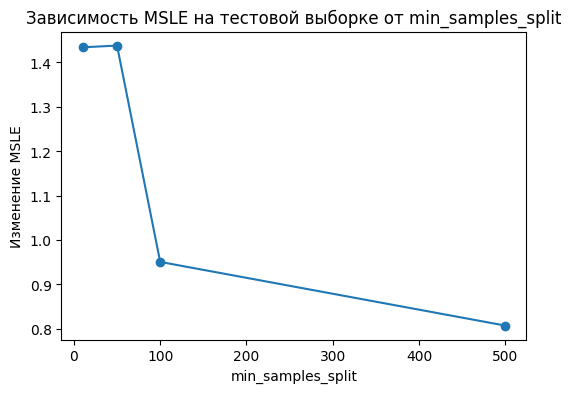

Лучшее MSLE значение: 0.807 при min_samples_split 500


In [209]:
### Определение минимального кол-ва объектов во внутренней вершине 

metrics_min_samples_split = {}

for min_samples_split in min_samples_split_list:

    pipe = Pipeline([
        ("transformer_encoder", MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="noise")),
        ("tree", DecisionTreeRegressor(min_samples_split=min_samples_split))
    ])

    pipe.fit(X_train, y_train)

    metrics_min_samples_split[f"split_{min_samples_split}"] = {}

    train_MSLE = np.mean((pipe.predict(X_train) - y_train) ** 2)
    test_MSLE = np.mean((pipe.predict(X_test) - y_test) ** 2)

    metrics_min_samples_split[f"split_{min_samples_split}"]["model"] = pipe
    metrics_min_samples_split[f"split_{min_samples_split}"]["min_samples_split"] = min_samples_split
    metrics_min_samples_split[f"split_{min_samples_split}"]["train_MSLE"] = train_MSLE
    metrics_min_samples_split[f"split_{min_samples_split}"]["test_MSLE"] = test_MSLE


# Построение графика зависимости MSLE от min_samples_split

split_vals = []
MSLE_vals = []

for name, params in metrics_min_samples_split.items():
    split_vals.append(params["min_samples_split"])
    MSLE_vals.append(params["test_MSLE"])

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(split_vals, MSLE_vals, marker='o')

plt.xlabel("min_samples_split")
plt.ylabel("Изменение MSLE")
plt.title("Зависимость MSLE на тестовой выборке от min_samples_split")

plt.show()

print(f"Лучшее MSLE значение: {round(min(MSLE_vals), 3)} при min_samples_split {split_vals[MSLE_vals.index(min(MSLE_vals))]}")

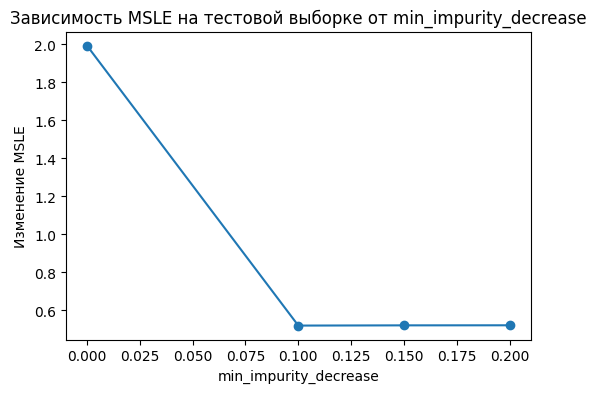

Лучшее MSLE значение: 0.519 при min_impurity_decrease 0.1


In [211]:
### Минимальный прирост качества (определяет минимальное уменьшение энтропии при разделении узла)

metrics_min_impurity_decrease = {}

for min_impurity_decrease in min_impurity_decrease_list:
    pipe = Pipeline([
        ("transformer_encoder", MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="noise")),
        ("tree", DecisionTreeRegressor(min_impurity_decrease=min_impurity_decrease))
    ])

    pipe.fit(X_train, y_train)

    metrics_min_impurity_decrease[f"impurity_{min_impurity_decrease}"] = {}

    train_MSLE = np.mean((pipe.predict(X_train) - y_train) ** 2)
    test_MSLE = np.mean((pipe.predict(X_test) - y_test) ** 2)

    metrics_min_impurity_decrease[f"impurity_{min_impurity_decrease}"]["model"] = pipe
    metrics_min_impurity_decrease[f"impurity_{min_impurity_decrease}"]["min_impurity_decrease"] = min_impurity_decrease
    metrics_min_impurity_decrease[f"impurity_{min_impurity_decrease}"]["train_MSLE"] = train_MSLE
    metrics_min_impurity_decrease[f"impurity_{min_impurity_decrease}"]["test_MSLE"] = test_MSLE

# Построение графика зависимости min_impurity_decrease и изменения метрик MSLE
impurity_vals = []
MSLE_vals = []

for name, params in metrics_min_impurity_decrease.items():
    impurity_vals.append(params["min_impurity_decrease"])
    MSLE_vals.append(params["test_MSLE"])

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(impurity_vals, MSLE_vals, marker='o')

plt.xlabel("min_impurity_decrease")
plt.ylabel("Изменение MSLE")
plt.title("Зависимость MSLE на тестовой выборке от min_impurity_decrease")

plt.show()

print(f"Лучшее MSLE значение: {round(min(MSLE_vals), 3)} при min_impurity_decrease {impurity_vals[MSLE_vals.index(min(MSLE_vals))]}")

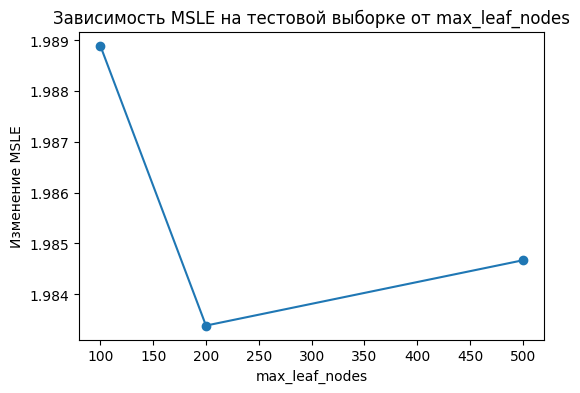

Лучшее MSLE значение: 1.983 при max_leaf_nodes 200


In [212]:
### Максимальное число листов (предикатов 

metrics_max_leaf_nodes = {}

for max_leaf_nodes in max_leaf_nodes_list:
    pipe = Pipeline([
        ("transformer_encoder", MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="noise")),
        ("tree", DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes))
    ])

    pipe.fit(X_train, y_train)

    metrics_max_leaf_nodes[f"leaf_{max_leaf_nodes}"] = {}

    train_MSLE = np.mean((pipe.predict(X_train) - y_train) ** 2)
    test_MSLE = np.mean((pipe.predict(X_test) - y_test) ** 2)

    metrics_max_leaf_nodes[f"leaf_{max_leaf_nodes}"]["model"] = pipe
    metrics_max_leaf_nodes[f"leaf_{max_leaf_nodes}"]["max_leaf_nodes"] = max_leaf_nodes
    metrics_max_leaf_nodes[f"leaf_{max_leaf_nodes}"]["train_MSLE"] = train_MSLE
    metrics_max_leaf_nodes[f"leaf_{max_leaf_nodes}"]["test_MSLE"] = test_MSLE

# Построение графика зависимости max_leaf_nodes и изменения метрик MSLE
leaf_vals = []
MSLE_vals = []

for name, params in metrics_max_leaf_nodes.items():
    leaf_vals.append(params["max_leaf_nodes"])
    MSLE_vals.append(params["test_MSLE"])

fig = plt.figure()
fig.set_size_inches(6, 4)

plt.plot(leaf_vals, MSLE_vals, marker='o')

plt.xlabel("max_leaf_nodes")
plt.ylabel("Изменение MSLE")
plt.title("Зависимость MSLE на тестовой выборке от max_leaf_nodes")

plt.show()

print(f"Лучшее MSLE значение: {round(min(MSLE_vals), 3)} при max_leaf_nodes {leaf_vals[MSLE_vals.index(min(MSLE_vals))]}")

Подберите лучшую комбинацию параметров, используя `GridSearchCV` и набор массивов значений параметров из предыдущего задания. Для лучшей комбинации посчитайте MSLE на тестовой выборке. Получились ли лучшие параметры такими же, как если бы вы подбирали их по-отдельности при остальных гиперпараметрах по умолчанию (предыдущее задание)? (2б)

In [221]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "decision_tree__max_depth": [3, 5, 8, 12],
    "decision_tree__min_samples_split": [10, 50, 100, 500],
    "decision_tree__min_impurity_decrease": [0, 0.1, 0.15, 0.2],
    "decision_tree__max_leaf_nodes": [100, 200, 500]
}
np.random.seed(1)

### Your code is here

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_recall_curve, auc

# Определение пайплайна

pipe_DT = Pipeline([
    ("transformer_encoder", MeanTargetEncoder_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price", mte_strategy="noise")),
    ("DT", DecisionTreeRegressor())
])

# Подбор лучшей модели с помощью GridSearchCV

param_grid = {
    'DT__max_depth': [3, 5, 8, 12], ### глубина дерева
    'DT__min_samples_split': [10, 50, 100, 500], ### минимальное кол-во объектов во внутренней вершине
    'DT__min_impurity_decrease': [0, 0.1, 0.15, 0.2], ### минимальный прирост качества (* понижения энтропии) 
    'DT__max_leaf_nodes': [100, 200, 500],  ### максимальное число листов
}

grid_search = GridSearchCV(pipe_DT,
                           param_grid, 
                           cv = 5, 
                           scoring="neg_mean_squared_error")

# Подгонка модели на обучающих данных
grid_search.fit(X_train, y_train)

# Вывод лучших параметров и оценки
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая оценка:", grid_search.best_score_)


Лучшие параметры: {'DT__max_depth': 12, 'DT__max_leaf_nodes': 200, 'DT__min_impurity_decrease': 0.1, 'DT__min_samples_split': 100}
Лучшая оценка: -0.5711538048136985


In [222]:
best_DT_model = grid_search.best_estimator_

In [223]:
### Получаем наилучшю метрику, перебрав все комбинации параметров
round(np.mean((best_DT_model.predict(X_test) - y_test) ** 2), 2)

0.52

In [276]:
class EncoderTransformer_(BaseEstimator, TransformerMixin):
    
    def __init__(self, categorical_cols, numeric_cols, target_name, threshold=5, encoding_method="one_hot", mte_strategy="noise", mte_fillna_strategy="none", noise_k=0.006):              

        self.categorical_cols = categorical_cols ### имена столбцов с категориальными значениями
        self.numeric_cols = numeric_cols ### имена столбцов с вещественными значениями
        self.target_name = target_name ### имя целевой переменной
        self.threshold = threshold ### порог уникальных значений категориальной фичи, при которой определяется будет она закодирована по ohe или mean target 
        self.encoding_method = encoding_method ### one_hot; label
        self.label_encoding_dicts = {}  ### словарь для хранения значений кодирования по label-енкодеру 
        self.mte_fillna_strategy = mte_fillna_strategy ### none; mean; mode
        self.mte_strategy = mte_strategy ### none; noise; cv_split; multiclass
        self.noise_k = noise_k ### коэффициент шума
        self.mean_target_dict = {} ### словарь для хранения средних значений по таргету (классификация) сгруппированных категориальных значений 
        self.dict_of_means = {} ### словарь для хранения средних значений по таргету (регрессия) сгруппированных категориальных значений 
        self.cols_to_ohe_encode = [] ### колонки, которые будут закодированы ohe-методами
        self.cols_to_mean_target_encode = [] ### колонки, которые будут закодированы mean tearget-методами


    def fit(self, X, y):
        
        X_fit = X.copy()
        y_fit = y.copy()
        
        X_with_target = pd.concat((X_fit, y_fit), axis=1) 
        
        ### Распределение категориальных фичей по энкодерам 
        for col in self.categorical_cols:
            if X_with_target[col].nunique() > self.threshold:
                self.cols_to_mean_target_encode.append(col)
            else:
                self.cols_to_ohe_encode.append(col)

        print(f"При отсечке = {self.threshold}")
        print(f"{len(self.cols_to_mean_target_encode)} - Кол-во фичей, которое будет закодировано mean target-энкодером")
        print(f"{len(self.cols_to_ohe_encode)} - Кол-во фичей, которое будет закодировано ohe-энкодером")

        ### Реализация ohe-энкодеров

        if self.encoding_method == 'one_hot':

            ### Запомним все ohe колонки и их названия
            self.ohe_names = {col : sorted([f"{col}_{value}" for value in X_with_target[col].unique()]) for col in self.cols_to_ohe_encode}


        elif self.encoding_method == 'label':
            ### Закодируем каждое категориальное значение в категориальном признаке  
            for col in self.cols_to_ohe_encode:
                label_encoding_dicts = {val: idx for idx, val in enumerate(X_with_target[col].unique())}
                self.label_encoding_dicts[col] = label_encoding_dicts


        ### Реализация mean target-энкодеров

        if self.mte_strategy == "none":

            """
            Кодирует категориальные признаки с использованием счетчиков на основе вещественной-целевой переменной.
            """

            for col in self.cols_to_mean_target_encode:
                self.dict_of_means[col] = X_with_target.groupby(col)[self.target_name].mean()

        elif self.mte_strategy == "noise":

            """
            Кодирует категориальные признаки с использованием счетчиков на основе вещественной-целевой переменной и добавляет шум.
            """

            for col in self.cols_to_mean_target_encode:
                self.dict_of_means[col] = X_with_target.groupby(col)[self.target_name].mean() + self.noise_k * np.random.randn(len(X_with_target[col].unique()))
    
        elif self.mte_strategy == "cv_split":

            """
            В данной реализации используется кросс-валидация, которая обеспечивает взаимодействие между фолдами. Вот как это происходит:
            1. Данные разбиваются на фолды, и каждый фолд используется как валидационный набор данных для оценки модели,
            обученной на остальных фолдах (тренировочных данных).
            2. Для вычисления счетчиков каждый фолд используется как часть обучающего набора данных, а другие фолды (кроме текущего)
            используются для вычисления статистики (среднего значения таргетной переменной для каждой категории).
            3. Это означает, что информация из других фолдов используется для создания счетчиков в текущем фолде.
            Таким образом, категориальные признаки в одном фолде расчитываются по значениям таргетной переменной из других фолдов.
            """

            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            for col in self.cols_to_mean_target_encode:
                col_means = []
                for index, (train_index, val_index) in enumerate(kf.split(X_with_target)):
                    kf_train = X_with_target.iloc[train_index]
                    count_map = kf_train.groupby(col)[self.target_name].mean()
                    count_map = count_map + self.noise_k * np.random.randn(len(count_map))
                    col_means.append(count_map)
                self.dict_of_means[col] = pd.concat(col_means, axis=1).mean(axis=1)

        elif self.mte_strategy == "multiclass":

            """
            Кодирует категориальные признаки с использованием счетчиков на основе мультиклассовой целевой переменной.
            """

            self.target_dummies = pd.get_dummies(y, prefix=self.target_name)
            X_with_target = pd.concat([X, self.target_dummies], axis=1)
            
            for col in self.cols_to_mean_target_encode:
                for tg in self.target_dummies.columns:
                    mean_target = X_with_target.groupby(col)[tg].mean()
                    if tg not in self.mean_target_dict:
                        self.mean_target_dict[tg] = {}
                    self.mean_target_dict[tg][col] = mean_target

            print(f"Сводка для кодирования мультиклассового-счетчика: ")
            print(f"Кол-во категориальных фичей: {len(self.cols_to_mean_target_encode)}")
            print(f"Кол-во уникальных классов: {y_fit.nunique()}")
            print(f"Кол-во столбцов, которое должно получится при кодировании: {len(self.cols_to_mean_target_encode) * y_fit.nunique()}")
            print(f"Окончательное кол-во столбцов с учетом отброса по одному столбцу от закодированного класса получается: {(len(self.cols_to_mean_target_encode) * y_fit.nunique()) + (X.shape[1] - len(self.cols_to_mean_target_encode)) - len(self.cols_to_mean_target_encode)}")

        else:
            raise ValueError("Unsupported mte_strategy strategy. Please choose either 'none', 'noise', 'cv_split' or 'multiclass'.")

        return self
    

            
    def transform(self, X):
        
        X_ = X.copy()
        df_orig = X_.drop(self.cols_to_ohe_encode + self.cols_to_mean_target_encode, axis=1)
        df_ohe = X_[self.cols_to_ohe_encode]
        df_mte = X_[self.cols_to_mean_target_encode]

        if len(self.cols_to_ohe_encode) != 0:

            if self.encoding_method == 'one_hot':
                data_part = pd.get_dummies(df_ohe, prefix=None)
                data_part.replace({False: 0, True: 1}, inplace=True)

                # Дропаем все оригинальные категориальные колонки, так как они нам больше не нужны 
                df_ohe = df_ohe.drop(self.cols_to_ohe_encode, axis=1)
                # Присоединяем все преобразованные категориальные колонки к датасету 
                df_ohe = pd.concat((df_ohe, data_part), axis=1)

                # Получение списка всех имен столбцов one-hot в рамках данного класса 
                all_ohe = list(itertools.chain(*list(self.ohe_names.values())))

                ### Фиксируем полученные столбцы после кодирования ohe
                data_part_cols = data_part.columns

                ### На проде или на тесте мы можем не получить категории, которые были в обучении,
                ### в таком случае нам необходимо зафиксировать данные категории и создать столбцы для 
                ### данных категорий, заполнив их нулями, таким образом мы сохраним изначальную размерность датасета на обучении
                missing_columns = [
                    x 
                    for x in all_ohe
                    if x not in df_ohe.columns
                    and
                    x not in self.numeric_cols
                ]

                ### Отсутствующие категории (бинарные колонки)
                ### необходимо добавить: заполним их просто нулями
                
                if len(missing_columns) != 0:

                    zeros = np.zeros((df_ohe.shape[0], len(missing_columns)))
                    zeros = pd.DataFrame(zeros,
                                        columns=missing_columns,
                                        index=df_ohe.index)

                    df_ohe = pd.concat((df_ohe, zeros), axis=1)


                ### Также на проде или на тесте мы можем получить новые категории, которые не видлеи на обучении,
                ### таким образом мы можем получить новые столбцы, делать этого нельзя, так как мы потеряем нашу размерноть, 
                ### поэтому фиксируем их и отбрасываем
                extra_columns = [
                    x
                    for x in data_part_cols
                    if x not in all_ohe
                ]

                ### Новые категории необходимо убрать
                df_ohe = df_ohe.drop(extra_columns, axis=1)

                # Инициализируем новый DataFrame для хранения результата
                new_df = pd.DataFrame()

                # Удаляем первый столбец для каждой категории для избегания мультиколлинеарности 
                for unique_pref in self.ohe_names.keys():
                    filtered_cols = df_ohe.filter(like=unique_pref).columns
                    # Получаем все столбцы категории
                    filtered_df = df_ohe[filtered_cols]
                    # Удаляем первый столбец и добавляем остальные в новый DataFrame
                    new_df = pd.concat([new_df, filtered_df.drop(filtered_df.columns[0], axis=1)], axis=1)

                # Обновляем df_ новыми значениями без первого столбца для каждой категории
                df_ohe = new_df

            elif self.encoding_method == 'label':

                for col in self.cols_to_ohe_encode:
                    encoding_dict = self.label_encoding_dicts[col]
                    df_ohe[col] = df_ohe[col].map(encoding_dict)
                    ### Если на проде или на тестовой выборке мы получили новые категории,
                    # то заполняем неизвестные категории значением -1
                    if df_ohe[col].isna().sum() != 0:
                        df_ohe[col] = df_ohe[col].fillna(-1)

            else:
                raise ValueError("Unsupported encoding method. Please choose either 'one_hot' or 'label'.")
        
            df_ohe = df_ohe[sorted(df_ohe.columns)]



        if len(self.cols_to_mean_target_encode) != 0:

            if self.mte_strategy != "multiclass":
                for col in self.cols_to_mean_target_encode:
                    df_mte[col] = df_mte[col].map(self.dict_of_means[col])
                    df_mte[col] = self.fillnans(df_mte, col, self.dict_of_means[col])
            else:
                new_columns = {}
                for col in self.cols_to_mean_target_encode:
                    for target in self.mean_target_dict.keys():
                        new_col_name = f"{col}_{target}"
                        new_columns[new_col_name] = X[col].map(self.mean_target_dict[target][col])
                        new_columns[new_col_name] = self.fillnans(new_columns, new_col_name, self.mean_target_dict[target][col])

                    ### Удаляем один закодированный столбец по категории для того чтобы избежать мультиколлинеарности
                    del new_columns[f"{col}_{target}"]

                df_mte = df_mte.join(pd.DataFrame(new_columns))
                df_mte.drop(columns=self.cols_to_mean_target_encode, inplace=True)
        

        return pd.concat((df_orig, df_ohe, df_mte), axis=1)


    def fillnans(self, X, col, dict_of_means):

        ### Если на проде или на тестовой выборке мы получили новые категории, которые не были в обучении
        ### то заполняем эти данные по общему среднему всех полученных значений для того чтобы избавится от NaN-ов

        if X[col].isna().sum() != 0:
            if self.mte_fillna_strategy == "none":
                X[col] = X[col].fillna(0)
            elif self.mte_fillna_strategy == 'mean':
                mean_value = dict_of_means.mean()
                X[col] = X[col].fillna(mean_value)
            elif self.mte_fillna_strategy == 'mode':
                mode_value = X[col].mode()[0]
                X[col] = X[col].fillna(mode_value)
            else:
                raise ValueError("Unsupported fillna strategy. Please choose either 'none', 'mean' or 'mode'.")
        return X[col]


In [277]:
transformer = EncoderTransformer_(categorical_cols=object_cols, numeric_cols=num_cols, target_name="selling_price")

transformer.fit(X_train, y_train)

train = transformer.transform(X_train)
test = transformer.transform(X_test)

train.head(10)

При отсечке = 5
2 - Кол-во фичей, которое будет закодировано mean target-энкодером
4 - Кол-во фичей, которое будет закодировано ohe-энкодером


C:\Users\danil\AppData\Local\Temp\ipykernel_14612\295442547.py:135: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_part.replace({False: 0, True: 1}, inplace=True)
C:\Users\danil\AppData\Local\Temp\ipykernel_14612\295442547.py:220: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[13.43759963 11.9113204  13.331648   ... 13.05254165 13.05254165
 12.93338526]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mte.loc[:, col] = df_mte[col].map(self.dict_of_means[col])
C:\Users\danil\AppData\Local\Temp\ipykernel_14612\295442547.py:135: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,name,year
3294,50000,1,0,0,0,0,0,0,0,1,0,0,13.463029,13.437600
2290,70000,0,0,0,1,0,0,0,0,1,0,0,12.112568,11.911320
874,50000,0,0,0,1,0,0,0,0,1,0,1,12.302297,13.331648
1907,92198,0,0,0,1,0,1,0,0,0,0,1,12.48425,13.052542
3244,3240,0,0,0,1,0,1,0,0,1,0,1,12.390077,12.859430
1089,10000,0,0,0,1,0,0,0,0,0,0,1,12.691639,13.437600
3902,90000,0,0,0,1,1,0,0,0,1,0,1,11.702986,11.506316
2215,79000,0,0,0,1,0,1,0,0,1,0,1,11.115863,11.506316
3862,99700,1,0,0,0,0,0,0,0,1,0,1,13.165072,13.331648
705,124000,1,0,0,0,0,1,0,0,1,0,1,12.992643,12.248310
